Most Important Characters in the Adventures of Sherlock Holmes 
-------------
Use web scraping and NLP to find the most frequent words in one of the classic literature: The Adventures of Sherlock Holmes by Arthur Conan Doyle.

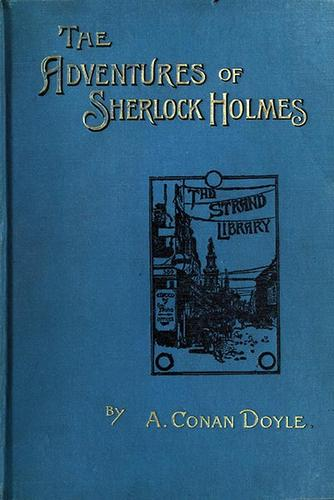


In [134]:
# import libraries

# importing http requests
import requests

# importing beautiful soup
from bs4 import BeautifulSoup

# importing NLT
import nltk

# importing Counter from Collection
from collections import Counter

#I importing classic packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [135]:
# retrieve the data through html get request
r = requests.get('https://www.gutenberg.org/files/1661/1661-h/1661-h.htm')
#print(r.status_code) # 200 is working 404 is not

# encoding the original data to a utf-8 format
r.encoding = 'UTF-8'

# print(r.text[:10000]) examines the text is available
book = r.text

In [136]:
# convert the html data into a beautiful soup object
soup = BeautifulSoup(book)

#print(soup.text[0:2000]) examines the text is clean and available
clean_book = soup.text

In [137]:
# clean the text

#print(clean_book[2028:5000]) trying to look for a beginning of the book
processed_book = clean_book[1380:]

#print(processed_book)

In [138]:
# use natural langauge toolkit to tokenize the data

# looking for words
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(processed_book)

# checking for tokenized words
#print(tokens[:100])


In [139]:
# convert the tokenized output into lowercase
lowercased_data = []

for i in tokens:
    lowercased_data.append(i.lower()) 
    
# checking if everyword is small
#print(lowercased_data[:100])

In [140]:
# run this code to install the nltk stopwords package if not installed previously
nltk.download('stopwords')

# find the stop words using natural language toolkit 
stop_words = nltk.corpus.stopwords.words('english')

#cheking for stopwords
#print(stop_words[:100])

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
# clean the text by removing the stop words 
clean_loweredcase = []

# making a for loop where a value is appended to a clear list if the value is not belong to stop_words.
for value in lowercased_data:
    if value not in stop_words:
        clean_loweredcase.append(value)

# checking for new list
print(clean_loweredcase[:100])

['scandal', 'bohemia', 'sherlock', 'holmes', 'always', 'woman', 'seldom', 'heard', 'mention', 'name', 'eyes', 'eclipses', 'predominates', 'whole', 'sex', 'felt', 'emotion', 'akin', 'love', 'irene', 'adler', 'emotions', 'one', 'particularly', 'abhorrent', 'cold', 'precise', 'admirably', 'balanced', 'mind', 'take', 'perfect', 'reasoning', 'observing', 'machine', 'world', 'seen', 'lover', 'would', 'placed', 'false', 'position', 'never', 'spoke', 'softer', 'passions', 'save', 'gibe', 'sneer', 'admirable', 'things', 'observer', 'excellent', 'drawing', 'veil', 'men', 'motives', 'actions', 'trained', 'reasoner', 'admit', 'intrusions', 'delicate', 'finely', 'adjusted', 'temperament', 'introduce', 'distracting', 'factor', 'might', 'throw', 'doubt', 'upon', 'mental', 'results', 'grit', 'sensitive', 'instrument', 'crack', 'one', 'high', 'power', 'lenses', 'would', 'disturbing', 'strong', 'emotion', 'nature', 'yet', 'one', 'woman', 'woman', 'late', 'irene', 'adler', 'dubious', 'questionable', 'mem

In [142]:
# count and find the top 30 used words in the text
output_data = Counter(clean_loweredcase)
top_words = output_data.most_common(30)
print(top_words)

[('said', 486), ('upon', 467), ('holmes', 463), ('one', 378), ('would', 327), ('man', 304), ('could', 287), ('mr', 275), ('little', 269), ('see', 232), ('may', 211), ('well', 201), ('us', 184), ('think', 174), ('must', 171), ('know', 171), ('room', 171), ('shall', 171), ('come', 162), ('time', 151), ('two', 148), ('came', 146), ('door', 144), ('back', 139), ('good', 137), ('face', 128), ('might', 126), ('matter', 125), ('yes', 125), ('much', 121)]


In [143]:
# find the name of characters from the top 200 words list
character_names = ["Holmes, Gutenberg, Watson"]

character_names

['Holmes, Gutenberg, Watson']

Text(0.5, 1.0, 'Top 30 Words')

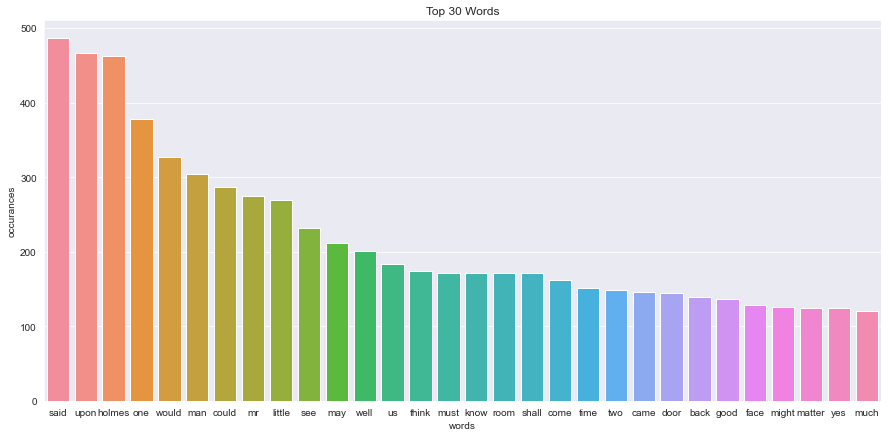

In [144]:
# visualize the top 30 words 
df = pd.DataFrame(top_words, columns = ['words', 'occurances'])
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.barplot(x='words', y='occurances', data = df, saturation = 0.9).set_title('Top 30 Words')